Importing all the libaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

Scrape a CSV file from the spreadsheet

In [2]:
# get csv from to df https://docs.google.com/spreadsheets/d/1ZafspjnRJuDjLRKotQ8awLTGcf3RLxrBEh2JtqRGh0Y/edit?usp=sharing
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1ZafspjnRJuDjLRKotQ8awLTGcf3RLxrBEh2JtqRGh0Y/export?format=csv')
df.head()

,Status,School,Program,Average,Date Accepted,Type (101/105),Discord,Other
0,Accepted,Brock University,Sport Management,89% (final grade 12 marks),"December 8, 2021",101,Denim#1627,NaN
1,Accepted,Brock University,Public Health (co-op),84%,December 17th,105F,Samantha#8888,French Baccalaureate
2,Accepted,Brock University,Bachelor of Accounting + Co-op,95.1,January 10th,101,Billion Dollar#9365,NaN
3,Accepted,Brock University,BA Honours: Interactive Arts & Science,"Gr.11 94%, first sem gr12 92%",Dec 8 2021,101,percn#0001,NaN
4,Accepted,Carelton University,Computer Systems Engineering,95%,NaN,NaN,Sarina#7691,NaN


Clean Data

In [3]:
# Let's remove all the columns that we don't need
df = df.drop(columns=['Discord', 'Other', 'Date Accepted']).reset_index(drop=True)
# Remove all the '%" in the average column
df['Average'] = df['Average'].str.replace('%', '')
# remove all + in the average column
df['Average'] = df['Average'].str.replace('+', '')
# Delete rows where average  NaN
df = df.dropna(how = 'any', subset=['Average'])

df.head(50)

C:\Users\poh001\AppData\Local\Temp/ipykernel_8976/3305083995.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Average'] = df['Average'].str.replace('+', '')


,Status,School,Program,Average,Type (101/105)
0,Accepted,Brock University,Sport Management,89 (final grade 12 marks),101
1,Accepted,Brock University,Public Health (co-op),84,105F
2,Accepted,Brock University,Bachelor of Accounting + Co-op,95.1,101
3,Accepted,Brock University,BA Honours: Interactive Arts & Science,"Gr.11 94, first sem gr12 92",101
4,Accepted,Carelton University,Computer Systems Engineering,95,NaN
5,Accepted,Carelton University,Bachelor of Computer Science,98.3,101
6,Accepted,Carelton University,Bachelor of Computer Science (co-op),91,101
7,Accepted,Carleton,Computer science (software engineering),94,101
8,Accepted,Carleton,BCS,mid 90's,105F
9,Accepted,Carleton,Coms and Media,"95 for Top 5, 92 for Top 6",101


UTSG CS

In [4]:
#Get all utsg

# get df where utsg is there
df_utsg1 = df[df['School'].str.contains('UTSG', na=False, case=False)]
# get df where the school has toronto in the name
df_utsg2 = df[df['School'].str.contains('Toronto', na=False, case=False)]
# get uoft
df_utsg3 = df[df['School'].str.contains('UOFT', na=False, case=False)]
#get u of t
df_utsg4 = df[df['School'].str.contains('U of T', na=False, case=False)]
# combine all 3
df_utsg = pd.concat([df_utsg1, df_utsg2, df_utsg3, df_utsg4])

# Get all cs within utsg not case sensitive
df_utsgcs1 = df_utsg[df_utsg['Program'].str.contains('Computer Science', na=False, case=False)]
df_utsgcs2 = df_utsg[df_utsg['Program'].str.contains('CS', na=False, case=False)]
df_utsgcs3 = df_utsg[df_utsg['Program'].str.contains('comp sci', na=False, case=False)]

df_utsg_cs = pd.concat([df_utsgcs1, df_utsgcs2, df_utsgcs3])

# drop all rows where school has scarbgrough in the name
df_utsg_cs = df_utsg_cs[~df_utsg_cs['School'].str.contains('Scarborough', na=False, case=False)]
# drop all rows where program has math in the name
df_utsg_cs = df_utsg_cs[~df_utsg_cs['Program'].str.contains('Math', na=False, case=False)]
# get all accepted
df_utsg_cs_accepted = df_utsg_cs[df_utsg_cs['Status'] == 'Accepted'].reset_index(drop=True)
df_utsg_cs_accepted101 = df_utsg_cs_accepted[df_utsg_cs_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_utsg_cs_accepted105 = df_utsg_cs_accepted[df_utsg_cs_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

#get average of df_utsg_cs_accepted average column
df_utsg_cs_accepted['Average'] = df_utsg_cs_accepted['Average'].astype(float)
df_utsg_cs_accepted105['Average'] = df_utsg_cs_accepted105['Average'].astype(float)
df_utsg_cs_accepted101['Average'] = df_utsg_cs_accepted101['Average'].astype(float)

print("Admission Average: " + str(df_utsg_cs_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_utsg_cs_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_utsg_cs_accepted105['Average'].mean()))


Admission Average: 97.93986956521738
Admission Average 101: 97.87984210526317
Admission Average 105: 98.225


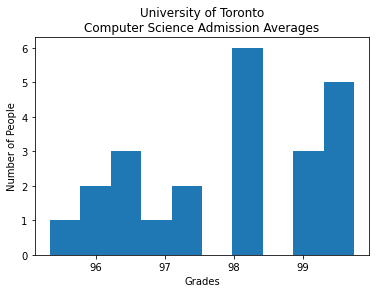

In [5]:
plt.title("University of Toronto\nComputer Science Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_utsg_cs_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

Waterloo Software Engineering

In [6]:
df_uw1 = df[df['School'].str.contains('UW', na=False, case=False)]
df_uw2 = df[df['School'].str.contains('University of Waterloo', na=False, case=False)]
df_uw3 = df[df['School'].str.contains('Waterloo', na=False, case=False)]

df_uw = pd.concat([df_uw1, df_uw2, df_uw3])

df_uw_se1 = df_uw[df_uw['Program'].str.contains('Software Engineering', na=False, case=False)]
df_uw_se2 = df_uw[df_uw['Program'].str.contains('SE', na=False, case=False)]
df_uw_se3 = df_uw[df_uw['Program'].str.contains('software eng', na=False, case=False)]
df_uw_se4 = df_uw[df_uw['Program'].str.contains('soft eng', na=False, case=False)]

df_uw_se = pd.concat([df_uw_se1, df_uw_se2, df_uw_se3]).reset_index(drop=True)

# get all the accepted
df_uw_se_accepted = df_uw_se[df_uw_se['Status'] == 'Accepted'].reset_index(drop=True)
df_uw_se_accepted101 = df_uw_se_accepted[df_uw_se_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_uw_se_accepted105 = df_uw_se_accepted[df_uw_se_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get the averages
df_uw_se_accepted['Average'] = df_uw_se_accepted['Average'].astype(float)
df_uw_se_accepted105['Average'] = df_uw_se_accepted105['Average'].astype(float)
df_uw_se_accepted101['Average'] = df_uw_se_accepted101['Average'].astype(float)

# print the averages
print("Admission Average: " + str(df_uw_se_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uw_se_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_uw_se_accepted105['Average'].mean()))
df_uw_se_accepted.head(50)



Admission Average: 98.50909090909092
Admission Average 101: 99.20000000000002
Admission Average 105: 91.6


,Status,School,Program,Average,Type (101/105)
0,Accepted,University of Waterloo,Software Engineering,99.2,101
1,Accepted,Waterloo,Software Engineering,99.0,101
2,Accepted,Waterloo,Software Engineering,99.7,101
3,Accepted,University of Waterloo,Software Engineering,99.2,101
4,Accepted,Waterloo,SE,97.8,101
5,Accepted,University of Waterloo,Software Engineering,99.2,101
6,Accepted,Waterloo,Software Engineering,99.0,101
7,Accepted,Waterloo,Software Engineering,99.7,101
8,Accepted,Waterloo,Software engineer,91.6,105D
9,Accepted,waterloo,software eng,100.0,101


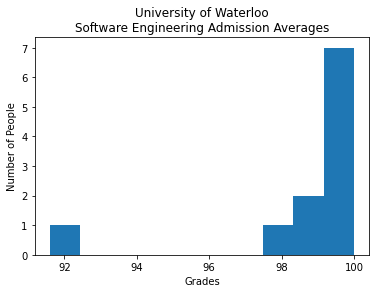

In [7]:
plt.title("University of Waterloo\nSoftware Engineering Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uw_se_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

Waterloo Computer Engineering

In [8]:
df_uw_ce1 = df_uw[df_uw['Program'].str.contains('Computer Engineering', na=False, case=False)]
df_uw_ce2 = df_uw[df_uw['Program'] == 'CE']
df_uw_ce5 = df_uw[df_uw['Program'] == 'ce']
df_uw_ce3 = df_uw[df_uw['Program'].str.contains('computer eng', na=False, case=False)]
df_uw_ce4 = df_uw[df_uw['Program'].str.contains('comp eng', na=False, case=False)]

df_uw_ce = pd.concat([df_uw_ce1, df_uw_ce2, df_uw_ce3, df_uw_ce4, df_uw_ce5]).reset_index(drop=True)

#get all accepted
df_uw_ce_accepted = df_uw_ce[df_uw_ce['Status'] == 'Accepted'].reset_index(drop=True)
df_uw_ce_accepted101 = df_uw_ce_accepted[df_uw_ce_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_uw_ce_accepted105 = df_uw_ce_accepted[df_uw_ce_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

df_uw_ce_accepted.head(50)
#get the averages
df_uw_ce_accepted['Average'] = df_uw_ce_accepted['Average'].astype(float)
df_uw_ce_accepted105['Average'] = df_uw_ce_accepted105['Average'].astype(float)
df_uw_ce_accepted101['Average'] = df_uw_ce_accepted101['Average'].astype(float)

# print the averages
print("Admission Average: " + str(df_uw_ce_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uw_ce_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_uw_ce_accepted105['Average'].mean()))

df_uw_ce_accepted.head(50)



Admission Average: 95.40724347826088
Admission Average 101: 95.40724347826088
Admission Average 105: nan


,Status,School,Program,Average,Type (101/105)
0,Accepted,University of Waterloo,Computer Engineering,94.0000,101
1,Accepted,University of Waterloo,Computer Engineering,94.5000,101
2,Accepted,Waterloo,Computer Engineering,98.2000,101
3,Accepted,Waterloo,Computer Engineering,97.5000,101
4,Accepted,waterloo,computer engineering,95.0000,101
5,Accepted,University of Waterloo,Computer Engineering,94.0000,101
6,Accepted,waterloo,computer engineering,92.8333,101
7,Accepted,waterloo,computer engineering,98.7500,101
8,Accepted,Waterloo,Computer Engineering,97.5000,101
9,Accepted,Waterloo,Computer Engineering,93.0000,101


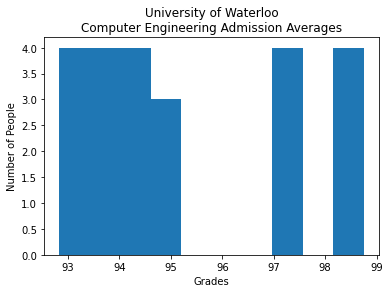

In [9]:
plt.title("University of Waterloo\nComputer Engineering Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uw_ce_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

UW Tron

In [10]:
df_uw_tron1 = df_uw[df_uw['Program'].str.contains('Tron', na=False, case=False)]
df_uw_tron2 = df_uw[df_uw['Program'].str.contains('Mechatronics', na=False, case=False)]

# combine
df_uw_tron = pd.concat([df_uw_tron1, df_uw_tron2]).reset_index(drop=True)

# get accepted
df_uw_tron_accepted = df_uw_tron[df_uw_tron['Status'] == 'Accepted'].reset_index(drop=True)
df_uw_tron_accepted101 = df_uw_tron_accepted[df_uw_tron_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_uw_tron_accepted105 = df_uw_tron_accepted[df_uw_tron_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get averages
df_uw_tron_accepted['Average'] = df_uw_tron_accepted['Average'].astype(float)
df_uw_tron_accepted105['Average'] = df_uw_tron_accepted105['Average'].astype(float)
df_uw_tron_accepted101['Average'] = df_uw_tron_accepted101['Average'].astype(float)

# print averages
print("Admission Average: " + str(df_uw_tron_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uw_tron_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_uw_tron_accepted105['Average'].mean()))

df_uw_tron.head(50)


Admission Average: 97.26727272727273
Admission Average 101: 97.26727272727273
Admission Average 105: nan


,Status,School,Program,Average,Type (101/105)
0,Accepted,University of Waterloo,Mechatronics Engineering,99.5,101
1,Accepted,University of Waterloo,Mechatronics Engineering,95.5,101
2,Accepted,University of Waterloo,Mechatronics Engineering,95.5,101
3,Accepted,University of Waterloo,Mechatronics Engineering (Hons. Co-op),98.17,101
4,Accepted,University of Waterloo,Mechatronics Engineering,98.3,101
5,Accepted,University of Waterloo,Mechatronics Engineering,99.5,101
6,Accepted,University Waterloo,Mechatronics engineering,96,101
7,Accepted,University of Waterloo,Mechatronics Engineering,95.5,101
8,Accepted,University of Waterloo,Mechatronics Engineering,95.5,101
9,Accepted,University of Waterloo,Mechatronics Engineering (Hons. Co-op),98.17,101


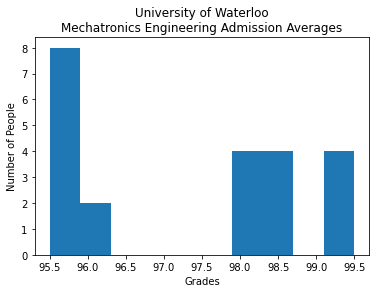

In [11]:
plt.title("University of Waterloo\nMechatronics Engineering Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uw_tron_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

UW MGMNT

In [12]:
df_uw_mgmnt = df_uw[df_uw['Program'].str.contains('Management', na=False, case=False)]

df_uw_mgmnt_accepted = df_uw_mgmnt[df_uw_mgmnt['Status'] == 'Accepted'].reset_index(drop=True)
df_uw_mgmnt_accepted101 = df_uw_mgmnt_accepted[df_uw_mgmnt_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_uw_mgmnt_accepted105 = df_uw_mgmnt_accepted[df_uw_mgmnt_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

#get the averages
df_uw_mgmnt_accepted['Average'] = df_uw_mgmnt_accepted['Average'].astype(float)
df_uw_mgmnt_accepted105['Average'] = df_uw_mgmnt_accepted105['Average'].astype(float)
df_uw_mgmnt_accepted101['Average'] = df_uw_mgmnt_accepted101['Average'].astype(float)

#print the averages
print("Admission Average: " + str(df_uw_mgmnt_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uw_mgmnt_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_uw_mgmnt_accepted105['Average'].mean()))

df_uw_mgmnt_accepted.head(50)

Admission Average: 96.24
Admission Average 101: 96.24
Admission Average 105: nan


,Status,School,Program,Average,Type (101/105)
0,Accepted,University of Waterloo,Management Engineering,96.0,101
1,Accepted,University of Waterloo,Management Engineering,96.0,101
2,Accepted,Waterloo,Management Eng,98.2,101
3,Accepted,waterloo,management engineering,95.2,101
4,Accepted,Waterloo,Management Eng,95.8,101


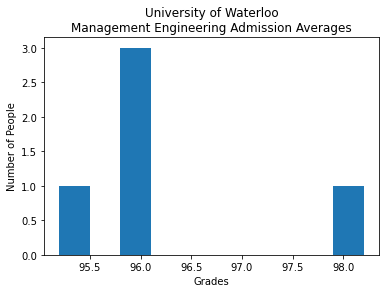

In [13]:
plt.title("University of Waterloo\nManagement Engineering Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uw_mgmnt_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

UOFT Eng Sci

In [14]:
df_utsg_engsci1 = df_utsg[df_utsg['Program'].str.contains('Engineering Science', na=False, case=False)]
df_utsg_engsci2 = df_utsg[df_utsg['Program'].str.contains('EngSci', na=False, case=False)]
df_utsg_engsci3 = df_utsg[df_utsg['Program'].str.contains('Eng sci', na=False, case=False)]

#combine
df_utsg_engsci = pd.concat([df_utsg_engsci1, df_utsg_engsci2, df_utsg_engsci3]).reset_index(drop=True)

# get accepted
df_utsg_engsci_accepted = df_utsg_engsci[df_utsg_engsci['Status'] == 'Accepted'].reset_index(drop=True)
df_utsg_engsci_accepted101 = df_utsg_engsci_accepted[df_utsg_engsci_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_utsg_engsci_accepted105 = df_utsg_engsci_accepted[df_utsg_engsci_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get average of 101
df_utsg_engsci_accepted['Average'] = df_utsg_engsci_accepted['Average'].astype(float)
df_utsg_engsci_accepted101['Average'] = df_utsg_engsci_accepted101['Average'].astype(float)
df_utsg_engsci_accepted105['Average'] = df_utsg_engsci_accepted105['Average'].astype(float)

# print averages
print("Admission Average: " + str(df_utsg_engsci_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_utsg_engsci_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_utsg_engsci_accepted105['Average'].mean()))




df_utsg_engsci.head(50)

Admission Average: 97.8875
Admission Average 101: 98.25
Admission Average 105: 96.8


,Status,School,Program,Average,Type (101/105)
0,Accepted,University of Toronto,Engineering Science,98,105F
1,Accepted,University of Toronto,Engineering Science,95.6,105F
2,Accepted,uoft,engineering science,98.2,101
3,Accepted,UofT,Engineering Science,98,101
4,Accepted,U of T,Engineering Science,98.3,101
5,Accepted,uoft,engsci,100.0,101
6,Accepted,UofT,Eng Sci,99,101
7,Accepted,U of T,Eng Sci,96,101


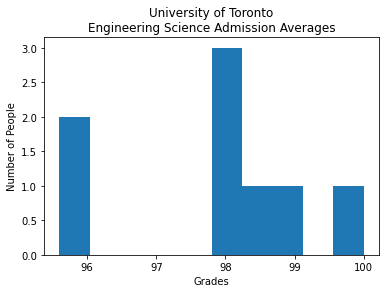

In [15]:
plt.title("University of Toronto\nEngineering Science Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_utsg_engsci_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

UOttawa CS

In [16]:
df_uottawa = df[df['School'].str.contains('ottawa', na=False, case=False)]

df_uottawa_cs1 = df_uottawa[df_uottawa['Program'].str.contains('CS', na=False, case=False)]
df_uottawa_cs2 = df_uottawa[df_uottawa['Program'].str.contains('Computer Science', na=False, case=False)]
df_uottawa_cs3 = df_uottawa[df_uottawa['Program'].str.contains('comp sci', na=False, case=False)]

# combine them
df_uottawa_cs = pd.concat([df_uottawa_cs1, df_uottawa_cs2, df_uottawa_cs3]).reset_index(drop=True)

# get accepted
df_uottawa_cs_accepted = df_uottawa_cs[df_uottawa_cs['Status'] == 'Accepted'].reset_index(drop=True)
df_uottawa_cs_accepted101 = df_uottawa_cs_accepted[df_uottawa_cs_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
# df_uottawa_cs_accepted105 = df_uottawa_cs_accepted[df_uottawa_cs_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

#get averages
df_uottawa_cs_accepted['Average'] = df_uottawa_cs_accepted['Average'].astype(float)
df_uottawa_cs_accepted101['Average'] = df_uottawa_cs_accepted101['Average'].astype(float)
# df_uottawa_cs_accepted105['Average'] = df_uottawa_cs_accepted105['Average'].astype(float)

#print averages
print("Admission Average: " + str(df_uottawa_cs_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uottawa_cs_accepted101['Average'].mean()))
# get the min 
print("Lowest Avg 105: " + str(df_uottawa_cs_accepted['Average'].min()))
print("Lowest Average 101: " + str(df_uottawa_cs_accepted101['Average'].min()))


Admission Average: 94.15333333333332
Admission Average 101: 94.41399999999999
Lowest Avg 105: 89.0
Lowest Average 101: 90.0


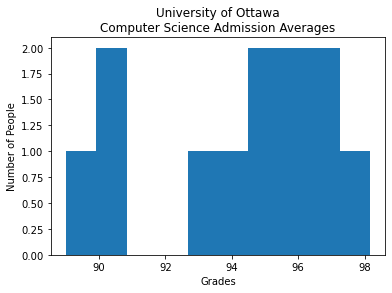

In [17]:
plt.title("University of Ottawa\nComputer Science Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uottawa_cs_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

Waterloo Engineering


In [18]:
df_uw_eng1 = df_uw[df_uw['Program'].str.contains('Engineering', na=False, case=False)]
df_uw_eng2 = df_uw[df_uw['Program'].str.contains('Eng', na=False, case=False)]

# combine
df_uw_eng = pd.concat([df_uw_eng1, df_uw_eng2]).reset_index(drop=True)

# get accepted
df_uw_eng_accepted = df_uw_eng[df_uw_eng['Status'] == 'Accepted'].reset_index(drop=True)
df_uw_eng_accepted101 = df_uw_eng_accepted[df_uw_eng_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_uw_eng_accepted105 = df_uw_eng_accepted[df_uw_eng_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get avvg
df_uw_eng_accepted['Average'] = df_uw_eng_accepted['Average'].astype(float)
df_uw_eng_accepted101['Average'] = df_uw_eng_accepted101['Average'].astype(float)
df_uw_eng_accepted105['Average'] = df_uw_eng_accepted105['Average'].astype(float)

# print averages 
print("Admission Average: " + str(df_uw_eng_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_uw_eng_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_uw_eng_accepted105['Average'].mean()))


Admission Average: 96.57820925925927
Admission Average 101: 96.62473457943926
Admission Average 105: 91.6


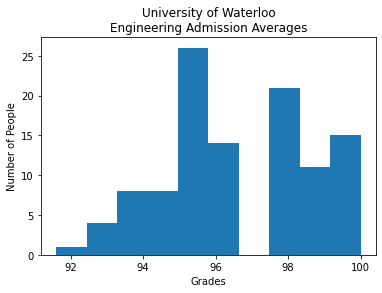

In [19]:
plt.title("University of Waterloo\nEngineering Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_uw_eng_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

Western Ivey

In [20]:
df_ivey = df[df['Program'].str.contains('ivey', na=False, case=False)]

# get accepted
df_ivey_accepted = df_ivey[df_ivey['Status'] == 'Accepted'].reset_index(drop=True)
df_ivey_accepted101 = df_ivey_accepted[df_ivey_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_ivey_accepted105 = df_ivey_accepted[df_ivey_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get avg
df_ivey_accepted['Average'] = df_ivey_accepted['Average'].astype(float)
df_ivey_accepted101['Average'] = df_ivey_accepted101['Average'].astype(float)
df_ivey_accepted105['Average'] = df_ivey_accepted105['Average'].astype(float)

# print averages
print("Admission Average: " + str(df_ivey_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_ivey_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_ivey_accepted105['Average'].mean()))

Admission Average: 96.44277777777776
Admission Average 101: 96.40437499999999
Admission Average 105: 96.75


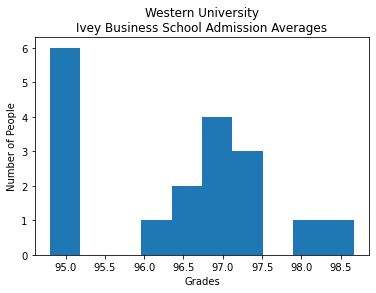

In [21]:
plt.title("Western University\nIvey Business School Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_ivey_accepted["Average"].tolist(), dtype=np.float64))
plt.show()

Queens Computing


In [22]:
df_queens1 = df[df['School'].str.contains("Queen's", na=False, case=False)]
df_queens2 = df[df['School'].str.contains("queens", na=False, case=False)]

#combine
df_queens = pd.concat([df_queens1, df_queens2]).reset_index(drop=True)

df_queens_cs1 = df_queens[df_queens['Program'].str.contains('Computer Science', na=False, case=False)]
df_queens_cs2 = df_queens[df_queens['Program'].str.contains('CS', na=False, case=False)]
df_queens_cs3 = df_queens[df_queens['Program'].str.contains('comp sci', na=False, case=False)]
df_queens_cs4 = df_queens[df_queens['Program'].str.contains('Computing', case=False)]

# combine
df_queens_cs = pd.concat([df_queens_cs1, df_queens_cs2, df_queens_cs3, df_queens_cs4]).reset_index(drop=True)

# get accepted
df_queens_cs_accepted = df_queens_cs[df_queens_cs['Status'] == 'Accepted'].reset_index(drop=True)
df_queens_cs_accepted101 = df_queens_cs_accepted[df_queens_cs_accepted['Type (101/105)'] == '101'].reset_index(drop=True)
df_queens_cs_accepted105 = df_queens_cs_accepted[df_queens_cs_accepted['Type (101/105)'].str.contains('105')].reset_index(drop=True)

# get avg
df_queens_cs_accepted['Average'] = df_queens_cs_accepted['Average'].astype(float)
df_queens_cs_accepted101['Average'] = df_queens_cs_accepted101['Average'].astype(float)
df_queens_cs_accepted105['Average'] = df_queens_cs_accepted105['Average'].astype(float)

# print averages
print("Admission Average: " + str(df_queens_cs_accepted['Average'].mean()))
print("Admission Average 101: " + str(df_queens_cs_accepted101['Average'].mean()))
print("Admission Average 105: " + str(df_queens_cs_accepted105['Average'].mean()))

df_queens_cs_accepted.head(50)


Admission Average: 96.74473684210525
Admission Average 101: 97.42333333333332
Admission Average 105: 94.2


,Status,School,Program,Average,Type (101/105)
0,Accepted,Queen's University,Computing (CS),94.20,105D
1,Accepted,Queen's University,Computing (CS),94.20,105D
2,Accepted,Queens,Mechatronics and Robotics Engineering,98.50,101
3,Accepted,Queen's,Bachelor of Computing (Hons.),97.50,101
4,Accepted,Queen's University,Bachelor of Computing,98.17,101
5,Accepted,Queen's University,Bachelor of Computing,99.00,101
6,Accepted,Queen's University,Bachelor of Computing,98.30,101
7,Accepted,Queen's University,Bachelor of Computing,98.17,101
8,Accepted,Queen's University,Computing (CS),94.20,105D
9,Accepted,Queen's University,Computing (CS),94.20,105D


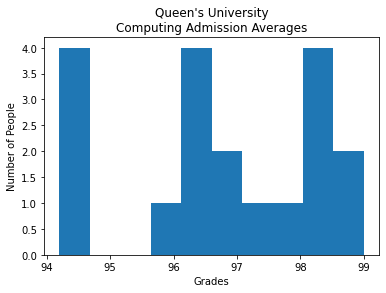

In [23]:
plt.title("Queen's University\nComputing Admission Averages")
plt.xlabel("Grades")
plt.ylabel("Number of People")
plt.hist(np.array(df_queens_cs_accepted["Average"].tolist(), dtype=np.float64))
plt.show()